<a href="https://colab.research.google.com/github/TenofJiwon/Python/blob/main/CNN_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1 Fashion MNIST dataset
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
print(x_train.shape)

(60000, 28, 28)


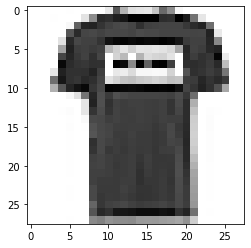

In [ ]:
plt.imshow(x_train[1], cmap='Greys')

In [ ]:
import sys

for x in x_train[1]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  1  0  0  0  0  41 18810354 48 43 87 16813316 0  0  0  0  0  0  0  0  
0  0  0  1  0  0  0  49 13621921622823625525525525521721525423116045 0  0  0  0  0  
0  0  0  0  0  14 1762222242122031981962002152042022012012012092182241640  0  0  0  
0  0  0  0  0  18821920019820219819919920119619819820020020020020120022541 0  0  0  
0  0  0  0  51 2191992032032122382482502452492462472522482352072032032221400  0  0  
0  0  0  0  11622620620420720410175 47 73 48 50 45 51 63 1132222022062202240  0  0  
0  0  0  0  2002222092032152000  70 98 0  10359 68 71 49 0  21920621421025038 0  0  
0  0  0  0  2472182122102152140  2542431392551742512552050  21521721420822095 0  0  
0  0  0  45 2262142142152242050  42 35 60 16 17 12 13 70 0  1892162122062121560  0  
0  0  0  16423521421122021620152 71 89 94 83 78 70 76 92 87 2062072222132192080  0  
0  0  0  1061872232372482111982522502482452482522532502522392012122252151931130  0  
0  0  0  0  0  17 54 15922219320819219720020020020020120319521016

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[300]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='selu'))
model.add(Dense(64, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
modelpath="./data/model/MNIST_CNN.hdf5"

model_checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
model_early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(x_train, y_train, validation_split=0.25, epochs=20, batch_size=200, verbose=0, callbacks = [model_early_stopping,model_checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.35367, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.35367 to 0.30038, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.30038 to 0.28834, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.28834 to 0.26811, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.26811 to 0.25456, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.25456 to 0.25044, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.25044 to 0.24527, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.24527 to 0.24335, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.24335 to 0.24091, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.24091

Epoch 11: val_loss did not improve from 0.24091

Epoch 12: val_loss did not impro

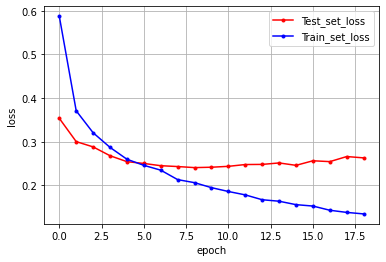

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Test_set_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Train_set_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()